# Data Mining Versuch Music Clustering
* Autor: Prof. Dr. Johannes Maucher
* Datum: 16.10.2015

[Übersicht Ipython Notebooks im Data Mining Praktikum](Data Mining Praktikum.ipynb)

# Einführung
## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Zugriff auf Musikdateien
* Transcodierung von mp3 zu wav 
* Extraktion von Merkmalen in Musikdateien (Feature Extraction)
* Optimierung mit dem genetischen Algorithmus
* Selektion der aussagekräftigsten Merkmale (Feature Selection)
* Clustering von Musikfiles (automatische Playlistgenerierung)


## Vor dem Versuch zu klärende Fragen

### Transcodierung von MP3 nach WAV und Merkmalsextraktion
In diesem Versuch wird der MP3 Decoder [mpg123](http://www.mpg123.de/) eingesetzt. Installieren und testen sie diesen Decoder vor dem Versuch auf ihrem Rechner. Machen Sie sich zunächst mit dem in Kapitel [Gegebene Module zur Transcodierung und Feature Extraction](#Gegebene-Module-zur-Transcodierung-und-Feature-Extraction) aufgeführten Code vertraut. Versuchen Sie Funktion und Ablauf dieses Programms zu verstehen und beantworten Sie folgende Fragen.

1. Was versteht man unter den statistischen Größen _Mittelwert, Standardabweichung, Skewness und Kurtosis_?
   + **Mittelwert:** Unter dem Mittelwert versteht man idR das arithmetische Mittel, welches den statistischen Durchschnittswert berechnet (Summe über alle Werte / Anzahl Werte). Dieser Wert ist eher weniger aussagekräftig, da es hohe Abweichungen geben kann. **Standardabweichung:** Die Standardabweichung meint die durchschnittliche Abweichung aller Ausprägungen eines Features vom arithmetischen Mittel (Mittelwert). Es ist sozusagen der durchschnittliche Abstand aller Daten vom Mittelwert. **Skewness:** Die Skewness beschreibt, wie sehr und in welche Richtung (links oder rechts) eine Häufigkeitsverteilung von der Gaußschen Normalverteilung abweicht. Jede nicht symmetrische Verteilung (symmetrisch = Normalverteilung) heißt schief. **Kurtosis:** Die Kurtosis beschreibt die Ausprägung der Abweichung einer Häufigkeitsverteilung von der Normalverteilung (siehe Skewness). Sprich, sie beschreibt ob eine Verteilung eher spitzer oder flacher ist, als die Gauß-Kurve. Je spitzer die Häufigkeitsverteilung, desto positiver ist die Kurtosis.
   
   <br/>
2. Was beschreibt die Fourier-Transformierte eines zeitlich ausgedehnten Signals?
   + Die Fourier-Transformierte erhält man mithilfe der Fourier-Transformation. Hier wird versucht, ein zeitkontinuierliches (oder auch zeitdiskretes) Signal durch Addition einer oder mehrerer Sinus-Kosinus-Funktionen mit unterschiedlichen Frequenzen und Amplituden zu beschreiben. Sprich (u.A.) ein nicht periodisches Signal durch periodische Signale darzustellen (die Fourier-Transformation ist auch auf periodische Signale anwendbar). Die Fourier-Transformierte ist dann die Funktion, welche alle periodischen Funktionen zusammenfasst und so das ursprüngliche Signal approximiert.
   
   <br/>
3. Mit welcher Samplingrate werden die WAV Dateien abgetastet?
   + Die Samplerate gibt an, wie oft in der Sekunde der Audiopegel einer Audiodatei erfasst und gespeichert wird. Sie wird in Hertz angegeben. Bei wav-Dateien in CD-Qualität nimmt die Samplingrate normalerweise einen Wert von ungefähr **44.1 kHz** an. Im vorliegenden Code lässt sich aus der Kommentarzeile `# Extract MP3 file to a mono, 10kHz WAV file` herauslesen, dass unsere wav-Dateien eine Samplingrate von **10 kHZ** nach Transformation aufweisen.
   <br/>
4. Insgesamt werden 42 Merkmale pro Musiksequenz extrahiert. Beschreiben Sie kurz diese Merkmale

    + Die 42 Merkmale sind in der Liste **FeatNames** gespeichert. Hier lässt sich eine gewisse Struktur erkennen. Der erste Teil der Merkmale beschreibt je in 4er Gruppen die Werte Mittelwert, Standardabweichung, Skewness und Kurtosis (s.o.). Jede Gruppe weist eine andere Amplitudenstärke auf, startend mit einer Amplitude von 1 bis hin zu einer Stärke von 1000. Der zweite Teil der Merkmalsliste beschreibt Power-Merkmale. Diese erklären wir uns als I DONT FUCKING KNOW 


### Matching der Teilsequenzen

1. Nachdem für jedes Musikstück die beiden Teilsequenzen in Form der extrahierten Merkmale vorliegen: Wie kann die Ähnlichkeit zwischen Teilsequenzen ermittelt werden?
2. Welche Numpy- bzw. Scipy-Module können Sie für die Bestimmung der Ähnlichkeit zwischen Teilsequenzen einsetzen?

## <span style="color:#900C3F">Dokumentation unserer Ergebnisse</span> 

+ zu 1.: Man wendet nun die jeweiligen Merkmalsgruppen auf alle Teilsequenzen (1. und 2. TS aller Lieder) an und vergleicht anschließend z.B. Merkmalsgruppe 1 der 1. TS von Lied 1 mit allen 2. Teilsequenzen aller anderen Lieder. Im Folgenden wird die Perfomance der Merkmale auf jede der 2. TS nach Liedern und Höhe des Unterschiedes der Merkmalsfunktion gerankt. Wenn die Analyse der Merkmalsgruppe auf Lied 1 abgestimmt ist und beim Vergleich mit den 2. TS aller anderen Lieder (gleiche Merkmalsgruppe) auffällt, dass es eine 2. TS gibt, die einen geringen Unterschied zu der Merkmalsfunktion von Lied 1 hat als die TS von Lied 1 selbst, so wird Lied 1 natürlich weiter unten gerankt. Dieses Ranking beschreibt die Ähnlichkeit zwischen Teilsequenzen (Ranking: [d(13) > d(12) > d(11) > ...] für d = Unterschied/ Abweichung der Merkmalsfunktion von (Lied-Nr. Lied-Nr.)).

+ zu 2.: Wir haben uns bei den Aufgaben des genetischen Algorithmus des Moduls **scipy.spatial.distance** bedient, da dieses alle möglichen Distanzen anbietet. Für numpy gibt es noch folgende Funktion um z.B. die euklididschen Distanzen zu berechnen: **np.linalg.norm**.

### Genetischer Algorithmus für die Merkmalsselektion

1. Beschreiben Sie die Prozesschritte im genetischen Algorithmus [Genetischer Algorithmus](https://www.hdm-stuttgart.de/~maucher/Python/FunktionenAlgorithmen/html/genAlgTSP.html)
2. In diesem Versuch wird davon ausgegangen, dass Merkmale dann gut sind, wenn durch sie die erste Teilsequenz eines Musikstücks durch einen ähnlichen Vektor wie die jeweils zweite Teilsequenz beschrieben wird. Wie kann mit dieser Annahme der genetische Algorithmus für die Merkmalsselektion angewandt werden. Unter Merkmalsselektion versteht man allgemein die Suche nach den $r$ besten Merkmalen aus einer Menge von insgesamt $R$ Merkmalen. In diesem Versuch werden initial $R=42$ Merkmale extrahiert, aus denen dann die besten $r<R$ Merkmale zu bestimmen sind. Überlegen Sie hierfür speziell wie die Fitnessfunktion, die Kreuzung und die Mutation zu realisieren sind.


## <span style="color:#900C3F">Dokumentation unserer Ergebnisse</span> 

zu 1.: Zuerst wird eine zufällige Population erzeugt, welche im Beispiel der Musikclustering-Aufgabe zB die Menge verschiedener Merkmalsgruppen darstellt. Im Folgenden kommt es zu einer loop. Darin wird zunächst die Fitness eines Chromosoms (einer Merkmalsgruppe) definiert und getestet, indem die Performance der jeweiligen Merkmalsgruppe bestimmt wird. Anschließend wird dann zufällig ein Paar der Merkmalsgruppen ausgewählt - dabei ist darauf zu achten, dass die Gruppen mit den besten Performances mit einer höheren Wahrscheinlichkeit ausgewählt werden. Darauffolgend kommt es zum sogenannten Crossover. Hier wird erst ein Kreuzungspunkt bestimmt und im Anschluss gekreuzt - in unserem Beispiel etwa durch das Mixen der Merkmale der beiden Chromosome ab dem definierten Kreuzungspunkt. Mit einer geringen Wahrscheinlichkeit kommt es im vorletzten Schritt zu einer Mutation. Beim Musikclustering wird eine Mutation etwa dadurch definiert, dass zufällig ein Merkmal ausgetauscht wird.

zu 2.: Nach der geschilderten Situation definieren wir die Fitness, Kreuzung und Mutation folgendermaßen:
Fitness: 
+ die Fitness ist konkret die Ähnlichkeit der beiden Vektoren - je ähnlicher 2 Vektoren sind, desto höher ist die Fitness. Eine Ähnlichkeitsfunktion ist beispielsweise die Euklidische Ähnlichkeit.
+ die Kreuzung ist wie oben beschrieben der Austausch von Merkmalen zwischen dem Chromosomenpaar ab einem Zufallsindex
+ die Mutation (ebenfalls s.o.) ist der zufällige Austausch von n >= 1 Merkmalen von mindestens einem Chromosom (nicht zwingend gegenseitiger Austausch) - Austausch mit übrigem Merkmalsset (übrige r in R)

### Clustering und Playlistgenerierung

1. Wie kann mit einem hierarchischen Clustering der Musikfiles eine Menge von Playlists erzeugt werden, so dass innerhalb einer Playlist möglichst ähnliche Titel zu finden sind?

## <span style="color:#900C3F">Dokumentation unserer Ergebnisse</span> 

Hierarchisches Clustering ist eine Familie der distanzbasierten Clusteranalysen. Man unterscheidet hier 2 grundlegende Ansätze: 
+ beim **divisiven** Clustering werden alle Objekte (hier: Titel) zunächst in ein großes Cluster gepackt, welches im Anschluss nach dem Ergebnis von Distanzverfahren (Umkehrung: Ähnlichkeitsverfahren) in kleinere Cluster unterteilt wird
+ beim **agglomerativen** Clustering wird jedes einzelne Objekt in ein eigenes Cluster gelegt, dann werden diese Cluster - gegenteilig zum divisiven Clustering - nach und nach zusammengefasst

Im Falle einer Musikplaylist ist somit das **agglomerative** Clustering vorzuziehen, da erreicht werden soll, dass einzelne Musikstücke zu einer Playlist zusammengefügt werden sollen. Die Frage die man sich dann stellen muss, ist, wie viele Cluster man will. Wenn man Playlisten haben will, die nur sehr ähnliche Lieder beinhaltet, dann sollte man ein höheres Clustering einstellen, sodass die Lieder spezifischer gruppiert werden. Wenn man einen Mix haben will von verschiedenen Genres dann kann man die Anzahl der Cluster runterstellen.

# Durchführung
## Gegebene Module zur Transcodierung und Feature Extraction
Mit dem in diesem Abschnitt gegebenen Code werden die im Unterverzeichnis _BandCollection_ befindlichen mp3-Files zunächst in wave decodiert. Danach werden aus den wave Dateien Audiomerkmale erhoben.

Von jedem Musikstück werden zwei disjunkte Teilsequenzen erhoben und von beiden Teilsequenzen jeweils ein Merkmalsvektor gebildet. Der Grund hierfür ist: Für die später folgende Bestimmung der wichtigsten Merkmale (Merkmalsselektion mit dem genetischen Algorithmus), wird angenommen dass Merkmale dann gut sind, wenn die aus ihnen gebildeten Merkmalsvektoren für Teilsequenzen des gleichen Musikstücks nahe beieinander liegen und die Merkmalsvektoren von Teilsequenzen unterschiedlicher Musikstücke weiter voneinander entfernt sind. In der Merkmalsselektion werden dann die Merkmale als relevant erachtet, für die diese Annahme zutrifft. 

**Aufgaben:**

1. Stellen Sie im unten gegebenen Code die Verzeichnisse für Ihre Musikdateien (aktuell Unterverzeichnis _BandCollection_) und für den Ort Ihres _mpg123_ Decoders richtig ein.
2. Die verwendete Musiksammlung sollte mindestens 5 verschiedene Interpreten möglichst unterschiedlicher Genres enthalten. Von jedem Interpret sollten mehrere Titel (evtl. ein ganzes Album) enthalten sein.
3. Führen Sie den in diesem Abschnitt gegebenen Programmcode zur Audiofeature-Extraction aus. Damit werden für alle Musiksequenzen jeweils 42 Merkmale extrahiert. Die extrahierten Merkmalsvektoren der jeweils ersten Sequenz werden in das File _FeatureFileTrainingAllList1.csv_ geschrieben, die der zweiten Teilsequen in das File _FeatureFileTestAllList2.csv_. 


## <span style="color:#900C3F">Dokumentation unserer Ergebnisse</span> 

Zuerst haben wir versucht mpg123 zum Laufen zu bekommen. Allerdings hatten wir da das Problem das nur einer bei uns in der Gruppe Windows benutzt. Bei der Person hatten wir den Pfad allerdings nicht richtig hinbekommen evtl. wegen Problemen mit / und  \ bei Windows. Danach haben wir alle Dateien in einem Online Konverter Tool (unbewusst) auf 44kHz und Stereo .wav Dateien konvertiert, weil wir die Aufgaben aufgeteilt haben und wir da noch nicht mitbekommen haben, dass wir alles auf 10kHz und Mono konvertieren sollten. 
Diese Dateien waren dann:
- Viel zu groß (3 GB ungefähr)
- Konnten auch nicht eingelesen werden

Im nächsten Schritt haben wir alle Dateien erneut konvertiert in Adobe Audition (Audacity ist kostenlos und hätte sicher auch funktioniert). Dort haben wir dann alle Dateien mühsam konvertiert um zu bemerken, dass die Libary `wave` nicht diese Kodierung erkennt, die standardmäßig eingestellt war in Adobe Audition. Anscheinend hielt es sich um eine 32Bit `float` Kodierung. Diese können aber von anderen Libraries gelesen werden, nämlich Soundfile, dann haben wir damit probiert die Dateien lesen zu können, damit wir nicht ein weiteres Mal konvertieren müssen. Das Lesen an sich hat zwar geklappt aber wir waren uns dann nicht sicher, beim Extrahieren der Merkmale und der Unterteilung in Teilsequenzen, weswegen wir uns entschieden haben den Code zu verwerfen und wieder auf wave zuzugreifen. Also mussten wir alle Dateien ein 4. Mal konvertieren, dieses Mal mit einer 16Bit `int` Kodierung, was dann funktioniert hat.

Allerdings haben auch nicht alle Songs funktioniert und einen `Chunk Features failed` Error geworfen hat, was dan den folgenden Zeilen gelegen hat:

```
n = 50 * 10000
if w.getnframes() < n * 3:
    raise ValueError('Wave file too short')
```

n war davor auf 60 gesetzt, was dazu geführt hatte, dass einige Lieder zu kurz (unter 3 Minuten) waren und somit auch nicht gelesen wurden. Deswegen haben wir die 60 auf 50 gesetzt und dann haben alle Lieder funktioniert. Der Link zu den konvertierten Dateien findet sich hier (Wird nicht weiter verbreitet!):
https://drive.google.com/file/d/1i2zVGeO2sM3MHM-tawUKQ0pGuqNVkvbz/view?usp=sharing

In [1]:
import subprocess
import wave
import struct
import numpy
import os
import pandas as pd

numpy.set_printoptions(precision=2,suppress=True)

#Names of features extracted in this module
FeatNames=["amp1mean","amp1std","amp1skew","amp1kurt","amp1dmean","amp1dstd","amp1dskew","amp1dkurt","amp10mean","amp10std",
           "amp10skew","amp10kurt","amp10dmean","amp10dstd","amp10dskew","amp10dkurt","amp100mean","amp100std","amp100skew",
           "amp100kurt","amp100dmean","amp100dstd","amp100dskew","amp100dkurt","amp1000mean","amp1000std","amp1000skew",
           "amp1000kurt","amp1000dmean","amp1000dstd","amp1000dskew","amp1000dkurt","power1","power2","power3","power4",
           "power5","power6","power7","power8","power9","power10"]

In [2]:
def moments(x):
    mean = x.mean()
    std = x.var()**0.5
    skewness = ((x - mean)**3).mean() / std**3
    kurtosis = ((x - mean)**4).mean() / std**4
    return [mean, std, skewness, kurtosis]

In [3]:
#Feature category 2: Frequency domain parameters
def fftfeatures(wavdata):
    f = numpy.fft.fft(wavdata)
    f = f[2:int(f.size / 2 + 1)]
    f = abs(f)
    total_power = f.sum()
    f = numpy.array_split(f, 10)
    return [e.sum() / total_power for e in f]

In [4]:
#Creating the entire feature vector per music-file
def features(x):
    x = numpy.array(x)
    f = []

    xs = x
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    xs = x.reshape(-1, 10).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    xs = x.reshape(-1, 100).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    xs = x.reshape(-1, 1000).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    f.extend(fftfeatures(x))
    return f

In [5]:
def read_wav(wav_file):
    """Returns two chunks of sound data from wave file."""
    w = wave.open(wav_file)
    n = 50 * 10000
    if w.getnframes() < n * 3:
        raise ValueError('Wave file too short')
    #For each music file 2 sequences, each containing n frames are subtracted. The first sequence starts at postion n,
    #the second sequence starts at postion 2n. The reason for extracting 2 subsequences is, that later on we like to
    #find the best features and in this exercise we assume that good features have the property that they are similar for 2 subsequences
    #of the same song, but differ for subsequences of different songs.
    w.setpos(n)
    frames = w.readframes(n)
    wav_data1 = struct.unpack('%dh' % n, frames)
    frames = w.readframes(n)
    wav_data2 = struct.unpack('%dh' % n, frames)
    return wav_data1, wav_data2

In [6]:
def compute_chunk_features(wav_file):
    """Return feature vectors for two chunks of an MP3 file."""
    # Extract MP3 file to a mono, 10kHz WAV file
    #mpg123_command = 'C:\Program Files (x86)\mpg123-1.22.0-x86\mpg123-1.22.0-x86\\mpg123.exe -w "%s" -r 10000 -m "%s"'
    #mpg123_command = 'C:\\Program Files (x86)\\mpg123-1.21.0-x86-64\\mpg123.exe -w "%s" -r 10000 -m "%s"'
    # mpg123_command = r'C:\Users\maucher\Downloads\mpg123-1.23.8-x86-64\mpg123-1.23.8-x86-64\\mpg123.exe -w "%s" - e s16 -r 10000 -m "%s"'
    # out_file = 'temp.wav'
    # cmd = mpg123_command % (out_file, mp3_file)
    # temp = subprocess.call(cmd)
    # Read in chunks of data from WAV file
    wav_data1, wav_data2 = read_wav(wav_file)
    # We'll cover how the features are computed in the next section!
    return numpy.array(features(wav_data1)), numpy.array(features(wav_data2))

In [7]:
fileList=[]
featureList1=[]
featureList2=[]
#Link zu allen konvertierten Liedern 
#https://drive.google.com/file/d/1i2zVGeO2sM3MHM-tawUKQ0pGuqNVkvbz/view?usp=sharing
#Specify the name of the directory, which contains your MP3 files here.
# This directory should contain for each band/author one subdirectory, which contains all songs of this author
for path, dirs, files in os.walk('./converted_music'):
    #print '-'*10,dirs,files
    for f in files:
        if not f.endswith('.wav'):
            # Skip any non-wav files
            continue
        wav_file = os.path.join(path, f)
        print(wav_file)
        # Extract the track name (i.e. the file name) plus the names
        # of the two preceding directories. This will be useful
        # later for plotting.
        tail, track = os.path.split(wav_file)
        tail, dir1 = os.path.split(wav_file)
        tail, dir2 = os.path.split(wav_file)
        # Compute features. feature_vec1 and feature_vec2 are lists of floating
        # point numbers representing the statistical features we have extracted
        # from the raw sound data.
        try:
            feature_vec1, feature_vec2 = compute_chunk_features(wav_file)
        except:
            print("Error: Chunk Features failed")
            continue
        title=str(track)
        title=str(dir1)+'\\'+str(track)
        print('-'*20+ title +'-'*20)
        #print "       feature vector 1:",feature_vec1
        #print "       feature vector 2:",feature_vec2
        fileList.append(title)
        featureList1.append(feature_vec1)
        featureList2.append(feature_vec2)

# Write feature vecotrs of all music files to pandas data-frame
MusicFeaturesTrain=pd.DataFrame(index=fileList,data=numpy.array(featureList1),columns=FeatNames)
MusicFeaturesTrain.to_csv("./FeatureFileTrainingAllList1.csv")

MusicFeaturesTest=pd.DataFrame(index=fileList,data=numpy.array(featureList2),columns=FeatNames)
MusicFeaturesTest.to_csv("./FeatureFileTestAllList2.csv")

./converted_music/LanaDelRey/07 Dark Paradise.wav
--------------------07 Dark Paradise.wav\07 Dark Paradise.wav--------------------
./converted_music/LanaDelRey/10 Million Dollar Man.wav
--------------------10 Million Dollar Man.wav\10 Million Dollar Man.wav--------------------
./converted_music/LanaDelRey/04 Video Games (Remastered).wav
--------------------04 Video Games (Remastered).wav\04 Video Games (Remastered).wav--------------------
./converted_music/LanaDelRey/01 Born to Die.wav
--------------------01 Born to Die.wav\01 Born to Die.wav--------------------
./converted_music/LanaDelRey/12 This Is What Makes Us Girls.wav
--------------------12 This Is What Makes Us Girls.wav\12 This Is What Makes Us Girls.wav--------------------
./converted_music/LanaDelRey/09 Carmen.wav
--------------------09 Carmen.wav\09 Carmen.wav--------------------
./converted_music/LanaDelRey/03 Blue Jeans (Remastered).wav
--------------------03 Blue Jeans (Remastered).wav\03 Blue Jeans (Remastered).wav----

--------------------09 Rumour Has It.wav\09 Rumour Has It.wav--------------------
./converted_music/Adele/05 Set Fire To The Rain.wav
--------------------05 Set Fire To The Rain.wav\05 Set Fire To The Rain.wav--------------------
./converted_music/Adele/03 Don't You Remember.wav
--------------------03 Don't You Remember.wav\03 Don't You Remember.wav--------------------
./converted_music/Adele/12 Lovesong.wav
--------------------12 Lovesong.wav\12 Lovesong.wav--------------------
./converted_music/Adele/17 Rolling In The Deep.wav
--------------------17 Rolling In The Deep.wav\17 Rolling In The Deep.wav--------------------
./converted_music/Adele/02 I'll Be Waiting.wav
--------------------02 I'll Be Waiting.wav\02 I'll Be Waiting.wav--------------------
./converted_music/Adele/06 If It Hadn't Been For Love.wav
--------------------06 If It Hadn't Been For Love.wav\06 If It Hadn't Been For Love.wav--------------------
./converted_music/Adele/13 Chasing Pavements.wav
--------------------13 

## Matching der Teilsequenzen
In diesem Abschnitt soll ein Verfahren implementiert werden, mit dem die Übereinstimmung der ersten Teilsequenz eines Musikstücks mit den zweiten Teilsequenzen aller anderen Musikstücke berechnet werden kann.

**Aufagben:**
1. Lesen Sie die im vorigen Teilversuch angelegten zwei csv-Dateien in jeweils einen eigenen Pandas Dataframe ein.
2. Skalieren Sie beide Teilsequenzmengen, so dass alle Merkmale eine Standardabweichung von 1 aufweisen. Z.B. mit [http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html).
2. Bestimmen Sie zu jeder Teilsequenz aus der Datei _FeatureFileTrainingAllList1.csv_ die euklidische Distanz zu allen Teilsequenzen aus der Datei _FeatureFileTestAllList2.csv_ und schreiben Sie diese Distanzen in eine aufsteigend geordnete Liste. Schreiben Sie auch die zugehörigen Argumente (Teilsequenzen) in eine geordnete Liste, sodass für jede Teilsequenz aus _FeatureFileTrainingAllList1.csv_ die am nächsten liegende Teilsequenz aus _FeatureFileTestAllList2.csv_ an erster Stelle steht, die zweitnächste Teilsequenz an zweiter usw.
3. Bestimmen Sie über alle Teilsequenzen aus _FeatureFileTrainingAllList1.csv_ den **mittleren Rang** an dem die zugehörige zweite Teilsequenz erscheint. Liegt z.B. für die erste Teilsequenz des Musikstücks A die zweite Teilsequenz nur an fünfter Stelle der geordneten nächsten Nachbarliste. Dann würde diese Teilsequenz mit dem Rang 5 in den Mittelwert einfließen.
4. Bestimmen Sie jetzt den mittleren Rang, für den Fall, dass _correlation_ anstelle _euclidean_ als Ähnlichkeitsmaß verwendet wird. Welches Ähnlichkeitsmaß ist für diese Anwendung zu bevorzugen?
5. Diskutieren Sie das Ergebnis


## <span style="color:#900C3F">Dokumentation unserer Ergebnisse</span> 


zu 1.: wir haben die beiden csv-Dateien mit der pandas Funktion ```read_csv()``` ausgelesen 

zu 2.: Hierfür haben wir die gegebene Funktion ```preprocessing.scale()``` angewendet und ein Dataframe erstellt jeweils auf die Trainingsdaten und auf die Testdaten

zu 3.: Die Herausforderung bei dieser Aufgabe war wie wir es gut darstellen und unterscheiden können zwischen den einzelnen Teilsequenzen. Allgemein haben wir über die Teilsequenzen1 iteriert und dann für jedes Lied nochmal über alle Teilsequenzen 2. Für alle Paare wurde dann die Distanz berechnet mithilfe der Funktion ```np.linalg.norm()```

zu 4.: Bei dieser Aufgabe haben wir für alle Teilsequenzen1 geguckt wann die zugehörige Teilsequenz2 auftritt und diese Indeezes gespeichert. Aus diesen Werten haben wir dann den mittleren Rang berechnet. Wenig überraschend ist aufgefallen, dass bei den meisten Liedern die 2.Teilsequenz die höchste Ähnlichkeit aufweist. Somit sollte der mittlere Rang über alle Lieder auch kein hoher Wert sein, obwohl es teilweise Ausreißer gab. Unser Ergebnis vonn 2,63 erscheint somit durchaus realistisch.


zu 5.: Für diese Aufgabe mussten wir die vorherigen nochmal neuschreiben, da sie sonst nicht gepasst haben. In diesem Fall ist die euklidische Distanz vorzuziehen, da uns die genaue Distanz der Lieder interessiert und nicht ob sie linear abhängig sind. Wir wollen die Lieder danach gruppieren, dass die Werte der ausgewählten Merkmale nicht weit auseinander liegen und nicht danach, dass sie eventuell auf einer Gerade liegen.

zu 6.: Auffällig ist, dass die Werte nicht weit auseinander liegen.  Bei Euklid werden allerdings die tatsächlichen Distanzen berechnet, wobei eine niedrigere Distanz besser ist und bei der Korrelation die lineare Abhängigkeit, bei der ein höherer Wert besser ist. Dass die Ergebnisse ähnlich sind zeigt dass die Lieder nicht nur ähnliche Distanzen haben sondern auch die Werte der Merkmale eine lineare Abhängigkeit aufweisen. ```

In [8]:
from sklearn import preprocessing as pp
import scipy as sci
import numpy as np

#1
MusicFeaturesTrain = pd.read_csv("FeatureFileTrainingAllList1.csv")
MusicFeaturesTest = pd.read_csv("FeatureFileTestAllList2.csv")

In [9]:
#2
MusicFeaturesTrainValues = MusicFeaturesTrain.iloc[: , 1:]
MusicFeaturesTrainValuesScaled = pd.DataFrame(pp.scale(MusicFeaturesTrainValues.values), columns=MusicFeaturesTrainValues.columns, index=MusicFeaturesTrainValues.index)
MusicFeaturesTrainValuesScaled

,amp1mean,amp1std,amp1skew,amp1kurt,amp1dmean,amp1dstd,amp1dskew,amp1dkurt,amp10mean,amp10std,...,power1,power2,power3,power4,power5,power6,power7,power8,power9,power10
0,-0.003373,0.446129,0.180536,-0.510997,-1.495230,-0.493731,-0.187275,-0.564593,-0.003373,0.580003,...,0.223957,0.762316,0.417733,-0.312364,-0.843881,-1.278125,-1.078202,-0.982070,0.174515,1.215124
1,0.264121,1.171209,-0.944230,-0.952895,0.445965,1.123563,-0.077099,-0.711770,0.264121,0.456257,...,-0.387198,2.055813,0.454788,0.040012,-0.364185,-0.893794,-0.745779,-1.359100,-1.255739,-1.155676
2,0.125221,-0.411630,-2.324707,-0.035169,-0.875614,-1.339164,2.322960,2.433244,0.125221,-0.375435,...,1.233135,1.550105,0.452476,-0.828110,-2.264524,-2.036517,-1.536251,-1.641613,-0.494338,-0.529528
3,0.208263,0.587207,-1.149538,-0.387997,1.891737,0.052972,-0.550246,-0.490230,0.208263,0.401904,...,0.417609,1.207338,0.267187,0.649507,-1.126802,-1.309081,-1.088522,-1.144012,-1.227699,-0.674294
4,0.060123,0.925907,-0.447873,-0.730563,-0.867341,0.381189,-0.719376,-0.512064,0.060123,0.814237,...,0.293495,0.273093,1.369492,0.282644,-0.600910,-1.038521,-0.761994,-0.903262,-1.018545,-0.316747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.042903,-0.642932,1.357565,-0.254282,-1.051273,0.289201,1.009483,0.079103,0.042903,-0.996191,...,-1.518965,0.641292,1.958771,1.357506,-0.414486,-0.074626,-0.549629,-0.220515,0.062974,-0.786924
66,-0.165626,-0.124553,0.086693,-0.257957,0.320041,0.728393,0.498007,0.057994,-0.165626,-0.328812,...,-0.603540,0.093127,-0.935069,1.523183,0.907942,1.283393,-0.559120,-0.158217,0.347756,-0.314564
67,0.001780,-0.524356,1.064355,-0.493486,0.351113,-0.457383,1.241163,0.311071,0.001780,-0.485087,...,-0.476042,0.162071,0.886481,1.222533,-0.222447,0.248047,-1.009069,-0.453509,0.349414,-0.941072
68,0.030564,-0.753589,1.690323,-0.159897,-0.738434,0.705934,1.220607,0.306402,0.030564,-1.257303,...,-2.733552,0.334971,1.358389,2.316821,0.790890,1.219976,-0.152125,0.066812,1.247050,0.195054


In [58]:
MusicFeaturesTestValues = MusicFeaturesTest.iloc[: , 1:]
MusicFeaturesTestValuesScaled = pd.DataFrame(pp.scale(MusicFeaturesTestValues.values), columns=MusicFeaturesTestValues.columns, index=MusicFeaturesTestValues.index)
MusicFeaturesTestValuesScaled

,amp1mean,amp1std,amp1skew,amp1kurt,amp1dmean,amp1dstd,amp1dskew,amp1dkurt,amp10mean,amp10std,...,power1,power2,power3,power4,power5,power6,power7,power8,power9,power10
0,-0.003373,0.446129,0.180536,-0.510997,-1.495230,-0.493731,-0.187275,-0.564593,-0.003373,0.580003,...,0.223957,0.762316,0.417733,-0.312364,-0.843881,-1.278125,-1.078202,-0.982070,0.174515,1.215124
1,0.264121,1.171209,-0.944230,-0.952895,0.445965,1.123563,-0.077099,-0.711770,0.264121,0.456257,...,-0.387198,2.055813,0.454788,0.040012,-0.364185,-0.893794,-0.745779,-1.359100,-1.255739,-1.155676
2,0.125221,-0.411630,-2.324707,-0.035169,-0.875614,-1.339164,2.322960,2.433244,0.125221,-0.375435,...,1.233135,1.550105,0.452476,-0.828110,-2.264524,-2.036517,-1.536251,-1.641613,-0.494338,-0.529528
3,0.208263,0.587207,-1.149538,-0.387997,1.891737,0.052972,-0.550246,-0.490230,0.208263,0.401904,...,0.417609,1.207338,0.267187,0.649507,-1.126802,-1.309081,-1.088522,-1.144012,-1.227699,-0.674294
4,0.060123,0.925907,-0.447873,-0.730563,-0.867341,0.381189,-0.719376,-0.512064,0.060123,0.814237,...,0.293495,0.273093,1.369492,0.282644,-0.600910,-1.038521,-0.761994,-0.903262,-1.018545,-0.316747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.042903,-0.642932,1.357565,-0.254282,-1.051273,0.289201,1.009483,0.079103,0.042903,-0.996191,...,-1.518965,0.641292,1.958771,1.357506,-0.414486,-0.074626,-0.549629,-0.220515,0.062974,-0.786924
66,-0.165626,-0.124553,0.086693,-0.257957,0.320041,0.728393,0.498007,0.057994,-0.165626,-0.328812,...,-0.603540,0.093127,-0.935069,1.523183,0.907942,1.283393,-0.559120,-0.158217,0.347756,-0.314564
67,0.001780,-0.524356,1.064355,-0.493486,0.351113,-0.457383,1.241163,0.311071,0.001780,-0.485087,...,-0.476042,0.162071,0.886481,1.222533,-0.222447,0.248047,-1.009069,-0.453509,0.349414,-0.941072
68,0.030564,-0.753589,1.690323,-0.159897,-0.738434,0.705934,1.220607,0.306402,0.030564,-1.257303,...,-2.733552,0.334971,1.358389,2.316821,0.790890,1.219976,-0.152125,0.066812,1.247050,0.195054


In [10]:
#3

index = MusicFeaturesTrainValuesScaled.index
number_of_rows = len(index)

titles_compared = {}
trennstrich = '\\'

for row in range(number_of_rows):
        trennstrichIndex = str(MusicFeaturesTrain["Unnamed: 0"][row]).find(trennstrich)
        first_title = str(MusicFeaturesTrain["Unnamed: 0"][row])[:trennstrichIndex]
        euclidic_distances = {}
        for other_row in range(number_of_rows):
            secondTrennstrichIndex = str(MusicFeaturesTrain["Unnamed: 0"][other_row]).find(trennstrich)
            second_title = str(MusicFeaturesTrain["Unnamed: 0"][other_row])[:secondTrennstrichIndex]
            euclidic_distances[first_title + "<-->" + second_title] = (np.linalg.norm(MusicFeaturesTrainValuesScaled.loc[row] - MusicFeaturesTestValuesScaled.loc[other_row]))
        titles_compared[first_title] = {k: v for k, v in sorted(euclidic_distances.items(), key=lambda item: item[1])}
                             
titles_compared


{'07 Dark Paradise.wav': {'07 Dark Paradise.wav<-->07 Dark Paradise.wav': 3.898562593179987,
  '07 Dark Paradise.wav<-->06 Pass the Mic.wav': 4.968776158563151,
  '07 Dark Paradise.wav<-->12 This Is What Makes Us Girls.wav': 5.174607446956059,
  "07 Dark Paradise.wav<-->12 Body Movin' (Fatboy Slim Remix).wav": 5.327417061957901,
  '07 Dark Paradise.wav<-->02 Off to the Races.wav': 5.401760808362843,
  "07 Dark Paradise.wav<-->13 Ain't No Sunshine.wav": 5.6188136782418745,
  '07 Dark Paradise.wav<-->09 Carmen.wav': 5.682463281150489,
  '07 Dark Paradise.wav<-->01 Born to Die.wav': 5.727226408203865,
  '07 Dark Paradise.wav<-->14 Sabotage.wav': 5.850019411547528,
  '07 Dark Paradise.wav<-->07 An Open Letter to NYC.wav': 5.891578553272831,
  '07 Dark Paradise.wav<-->17 Rolling In The Deep.wav': 6.059352492945968,
  '07 Dark Paradise.wav<-->05 Diet Mountain Dew.wav': 6.186025188060466,
  '07 Dark Paradise.wav<-->01 Bombtrack.wav': 6.2828430686093215,
  '07 Dark Paradise.wav<-->09 Rumour Ha

In [11]:
best_titles_compared = [[title for title in titles_compared.get(comparison).keys()][0] for comparison in titles_compared]
best_titles_compared


['07 Dark Paradise.wav<-->07 Dark Paradise.wav',
 '10 Million Dollar Man.wav<-->10 Million Dollar Man.wav',
 '04 Video Games (Remastered).wav<-->17 Rolling In The Deep.wav',
 "01 Born to Die.wav<-->12 Body Movin' (Fatboy Slim Remix).wav",
 '12 This Is What Makes Us Girls.wav<-->12 This Is What Makes Us Girls.wav',
 '09 Carmen.wav<-->09 Carmen.wav',
 '03 Blue Jeans (Remastered).wav<-->03 Blue Jeans (Remastered).wav',
 '05 Diet Mountain Dew.wav<-->01 Born to Die.wav',
 '06 National Anthem.wav<-->06 National Anthem.wav',
 '08 Radio.wav<-->08 Radio.wav',
 '02 Off to the Races.wav<-->02 Off to the Races.wav',
 '11 Summertime Sadness.wav<-->02 Off to the Races.wav',
 "04 He's a Pirate (Pirates of the Car 1.wav<-->09 Township Rebellion.wav",
 '11 Thunderstruck.wav<-->01 Smooth Criminal 1.wav',
 '12 New Day.wav<-->05 Summertime 1.wav',
 '01 Smooth Criminal 1.wav<-->01 Smooth Criminal 1.wav',
 '05 Summertime 1.wav<-->05 Summertime 1.wav',
 '02 Who Wants to Live Forever_ 1.wav<-->15 Winter Lulla

In [61]:
mittlere_raenge = []
vergleich_pfeile = "<-->"

for sequence_key in titles_compared.keys():
    index = 0
    mittlere_raenge_zwischenergebnisse = []
    
    for comparison in titles_compared.get(sequence_key):
        mittlere_raenge_zwischenergebnisse.append({comparison: index + 1})
        index = index + 1
        
    for indexed_comparison_array in mittlere_raenge_zwischenergebnisse:
        for indexed_comparions in indexed_comparison_array:
            pfeil_index = str(indexed_comparions).find(vergleich_pfeile)
            first_title = indexed_comparions[:pfeil_index]
            second_title = indexed_comparions[pfeil_index + 4:]
            if first_title == second_title:
                mittlere_raenge.append(indexed_comparison_array.get(indexed_comparions))

mittlerer_rang = np.asarray(mittlere_raenge).sum() / len(mittlere_raenge)
print("Euklid: " + str(mittlerer_rang))

Euklid: 2.6285714285714286


In [62]:
#5

index = MusicFeaturesTrainValuesScaled.index
number_of_rows = len(index)

corr_titles_compared = {}
trennstrich = '\\'

for row in range(number_of_rows):
        trennstrichIndex = str(MusicFeaturesTrain["Unnamed: 0"][row]).find(trennstrich)
        first_title = str(MusicFeaturesTrain["Unnamed: 0"][row])[:trennstrichIndex]
        correlation = {}
        for other_row in range(number_of_rows):
            secondTrennstrichIndex = str(MusicFeaturesTrain["Unnamed: 0"][other_row]).find(trennstrich)
            second_title = str(MusicFeaturesTrain["Unnamed: 0"][other_row])[:secondTrennstrichIndex]
            correlation[first_title + "<-->" + second_title] = MusicFeaturesTrainValuesScaled.loc[row].corr(MusicFeaturesTestValuesScaled.loc[other_row])
        corr_titles_compared[first_title] = {k: v for k, v in sorted(correlation.items(), key=lambda item: item[1], reverse=True)}

corr_best_titles_compared = [[title for title in corr_titles_compared.get(comparison).keys()][0] for comparison in corr_titles_compared]

corr_mittlere_raenge = []
vergleich_pfeile = "<-->"

for sequence_key in corr_titles_compared.keys():
    index = 0
    corr_mittlere_raenge_zwischenergebnisse = []
    
    for comparison in corr_titles_compared.get(sequence_key):
        corr_mittlere_raenge_zwischenergebnisse.append({comparison: index + 1})
        index = index + 1
        
    for indexed_comparison_array in corr_mittlere_raenge_zwischenergebnisse:
        for indexed_comparions in indexed_comparison_array:
            pfeil_index = str(indexed_comparions).find(vergleich_pfeile)
            first_title = indexed_comparions[:pfeil_index]
            second_title = indexed_comparions[pfeil_index + 4:]
            if first_title == second_title:
                corr_mittlere_raenge.append(indexed_comparison_array.get(indexed_comparions))

corr_mittlerer_rang = np.asarray(corr_mittlere_raenge).sum() / len(corr_mittlere_raenge)
print("Correlation: " + str(corr_mittlerer_rang))

Correlation: 2.9857142857142858


## Merkmalsauswahl mit dem genetischen Algorithmus
In diesem Abschnitt soll unter Anwendung eines selbst zu implementierenden genetischen Algorithmus eine Untermenge wichtiger Merkmale aus den insgesamt 42 angelegten Merkmalen berechnet werden.
Als Vorlage kann hierfür die Implementierung für die [Lösung des TSP Problems](https://www.hdm-stuttgart.de/~maucher/Python/FunktionenAlgorithmen/html/genAlgTSP.html) herangezogen werden. Anzupassen sind dann jedoch mindestens die Fitness-Funktion, die Kreuzungs- und die Mutationsfunktion. Die Fitness soll so wie im vorigen Teilabschnitt mit dem mittleren Rang berechnet werden. Die Populationsgröße, die Anzahl der auszuwählenden Merkmale und die Anzahl der Iterationen sollen als Parameter einstellbar sein.

Der Fitnesswert des besten Individuums in der Population soll in jeder Iteration gespeichert werden. Der Verlauf dieses besten Fitness-Wertes über den Fortlauf der Iterationen soll graphisch ausgegeben werden.

Ein Pandas Frame, der nur die berechneten wichtigsten Merkmale aus _FeatureFileTrainingAllList1.csv_ enthält soll angelegt und in die csv Datei _subFeaturesTrain1.csv_ geschrieben werden.

**Aufgaben:**
1. Implementieren Sie die die Merkmalsauswahl mit dem genetischen Algorithmus entsprechend der o.g. Beschreibung
2. Beschreiben Sie kurz das Konzept ihrer Kreuzungs- und Mutationsfunktion. 
3. Bestimmen Sie eine möglichst kleine Merkmalsuntermenge mit einem möglichst guten mittleren Rang? Geben Sie sowohl die gefundenen wichtigsten Merkmale als auch den zugehörigen mittleren Rang an.
4. Um wieviel verschlechtert sich der Mittlere Rang, wenn nur die 10 wichtigsten Merkmale benutzt werden?

#### Genetischer Algorithmus für die Music Feature Selection

## <span style="color:#900C3F">Dokumentation unserer Ergebnisse 1/2</span> 

Jetzt kommen wir zur womöglich aufwendigsten Aufgabe bisher. Also bis jetzt hatten als wir ganze Gruppe die meisten Probleme hier, wobei es doch eigentlich ziemlich simpel war. Der genetische Algorithmus war hierfür bereits komplett programmiert:
https://www.hdm-stuttgart.de/~maucher/Python/FunktionenAlgorithmen/html/genAlgTSP.html

Also eigentlich müsste man, das nur übernehmen und für unseren Fall abändern. Bei aber so langem Code der dann noch oft iteriert und Zufallswerte bei diesen Iterationen generiert, ist das debuggen des Problems natürlich nicht so leicht. Den genetischen Algorithmus nochmal Schritt für Schritt zu erklären, scheint nicht sinnvoll für uns zu sein, deswegen gehen wir nur durch die einzelnen Schritte.

Zu Beginn haben wir mit einer `sample` size von 15 gestartet, manchmal auf 10 jetzt am Ende aber mit 20 getestet. Eventuell wäre es besser und informativer gewesen, wenn man zwischen den Iterationen die `sample` zufällig ändert, aber das hätte uns bei mehreren Iterationen viele Indize Fehler gegeben, weswegen wir, dass gelassen haben. 

Bei der Fitness Funktion haben wir am Meisten Zeit gebraucht, weil wir zuerst darauf kommen mussten, dass man mean rank berechnen musste, was an sich kein Problem war, weil wir das bereits bei den Aufgaben darüber gemacht haben.
Hier waren allerdings 2 Schwierigkeiten:
1. Wir mussten nicht für die gesamte Liste die mit ursprünglich `mean_dict` erstellt wird sowie in den Aufgaben davor, sondern für jedes Subarray "Chromosom" aus unserer Population
2. Wir **hätten** scipy.spatial.distance.cdist benutzen sollen in unserem Code. Dadurch, dass wir aber in den Aufgaben davor schon nicht scipy benutzt hatten, was man sicherlich leicht mit der Dokumentation hier implementieren hätte können: https://docs.scipy.org/doc/scipy/reference/spatial.distance.html, sondern für euklidische Distanzen numpy und für correlation pandas benutzt haben. Hatten wir auch den Code in `mean_dict` für die euklidischen Distanzen wieder mit numpy berechnen lassen. Im Nachhinein wäre es besser gewesen nicht Reihe für Reihe die euklidischen Distanzen zu berechnen sondern ein 2 Dimensionales Array zu erstellen, bei dem man dann https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html hätte anwenden können. Somit hätte man sich deutlich Zeit gespart, weil der Funktionsaufruf deutlich schneller geht, als wenn man alles einzeln berechnet. Da wir aber bereits so weit mit dem Code davor gekommen sind und es funktioniert hatte, war es uns dann zeit-technisch mit der Abgabe nicht mehr so klug, dies umzuprogrammieren.

Bei der Selektion hatten wir überraschend kein Problem, aber dafür bei der Kreuzung und Mutation.
Die Selektion hatte uns zwischen Iterationen immer `child1` und `child2` zurückgegeben, welche entweder zu kurz oder zu lang waren für die `SortedPopulation` was dann für Fehler gesorgt hat. Deswegen haben wir diese auf die `sample` size gekürzt. In der Theorie mit dem Code sollte, das aber keine Merkmale zu wenig haben, da das Prinzip dieser generierten childs, sowieso zufällig durch das `cp`unter Anderem ist. Jedenfalls hatte, das die meisten Probleme zwischen Iterationen geschafft.

Die Mutation konnte man mit nur wenigen Änderungen komplett übernehmen. Beim letzten Schritt, wo die Chromosome ersetzt werden, trat dann meistens der Fehler von `child1` oder `child2` auf, dass die Länge dieser zu klein/zu groß war. Was hier auch ein Leichtsinnsfehler war, wesewegn sich zwischen Iterationen Nichts verändert hatte, war, dass wir 
1. Nicht die population mit der neu iteriert wird auf die neue sortedPopulation mit den neuen Chromosomen gesetzt wird
2. Wir die sortedPopulation nicht erneut sortiert haben, nachdem falls die neuen Chromosomen eingesetzt werden und somit die population nicht mehr sortiert war.

Wir haben den Algorithmus 50 mal iterieren lassen (Eigentlich sollte man viel viel öfters iterieren lassen, aber da 50 Iterationen bei uns schon etwas dauern, haben wir es bei 50 belassen). Das Ergebnis der wichtigsten Merkmale haben wir direkt in die csv dann geschrieben.

Zur Aufgabe 2 unsere Kreuzung basiert, darauf dass eine zufällige Zahl `cp` generiert wird, welche einen Teil von einem `parent` übernimmt und dann einen `tail` jeweils generiert, welchen vom anderen parent ein paar Merkmale übernimmt, sodass beide `child` am Ende Merkmale von beiden `parent` übernehmen. In der Mutation welche nur mit einer Chance von 5% bei uns eintritt, wird vom child jeweils das letzte mit dem Ersten Element getauscht

Zur Aufgabe 3 kam bei uns nach den 50 Iterationen folgende Merkmale mit mittlerem Rang heraus:
```
2.357142857142857
['amp100std' 'amp10dskew' 'amp10skew' 'amp100dstd' 'amp10std'
 'amp1000skew' 'amp10mean' 'power8' 'amp1dskew' 'amp100dmean' 'amp1skew'
 'amp100skew' 'power9' 'power5' 'amp100dkurt' 'amp1dkurt' 'power6'
 'amp100std' 'amp1skew' 'amp100mean']
```
Die Aufgabe 3 hatten wir bereits angefangen zu bearbeiten bevor, wir genau wussten wie der genetische Algorithmus funktioniert bzw wie man das Ergebnis interpretiert. Das Ergebnis dieser Versuche findet sich unter diesem Codeblock

In [39]:
from scipy.spatial import distance
import copy

def mean_dict(merkmale, list_one, list_two):
    music_titles = dict()
    distances = dict()
    for index, row in MusicFeaturesTestValuesScaled[merkmale].iterrows():
        for other_index, other_row in MusicFeaturesTrainValuesScaled[merkmale].iterrows():
            distances[str(list_two.iloc[:,0].loc[other_index])] = np.linalg.norm(row-other_row)
        sorted_distances = dict(sorted(distances.items(), key=lambda item: item[1]))
        my_copy = copy.deepcopy(sorted_distances)
        music_titles[str(list_one.iloc[:,0].loc[index])] = my_copy
    return music_titles

In [15]:
def mean_rank(result_dict):
    sum_ranks = 0
    mean_rank = 0
    for song in result_dict:
        rank = 1
        for other_song in result_dict[song]:
            if(song == other_song):
                sum_ranks += rank
                break
            else:
                rank += 1
    mean_rank = sum_ranks / len(result_dict)
    return mean_rank

In [35]:
#Definition der Konstanten für den GA
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import random

ITERATIONS = 50;
POPSIZE = 16;
CROSSPROP = 0.99;
MUTPROP = 0.05;
sample = 20 #Anzahl Merkmale

bestDist = np.zeros(ITERATIONS) 
population = []

for j in range(POPSIZE):
        sub_population = []
        for counter in range(sample):
            random_number = random.randint(0, len(FeatNames) - 1)
            sub_population.append(FeatNames[random_number])
        population.append(sub_population)            

costs = [{}] * POPSIZE
locations=np.zeros((len(FeatNames),2)) #Zufällige Festlegung der Orte
distances = squareform(pdist(locations,'euclidean'))
mean_ranks = np.zeros(POPSIZE)

for it in range(ITERATIONS):
        #1.Berechne Fitness der aktuellen Chromosomen#################################################
        for j, pop in enumerate(population):
            costs[j] = mean_dict(pop, MusicFeaturesTrain, MusicFeaturesTest)
            
        for i, cost in  enumerate(costs):
            mean_ranks[i] = mean_rank(cost)
            
        sortedIndex = mean_ranks.argsort(axis=0) #Indizees der nach ansteigenden Kosten sortierten Chromosomen
        sortedCost = mean_ranks[sortedIndex] #die ansteigend sortierten Kosten
        bestDist[it] = sortedCost[0]
        sortedPopulation = np.array(population)[sortedIndex.astype(int)] #Sortierung der Population nach ansteigenden Kosten
        InvertedCost = 1 / sortedCost
        
        if it % 5 == 0:
                print('-'*10+' Iteration: ',it)
                print(InvertedCost[0])
                print(sortedPopulation[0])

            
        #2.Selektion: Zufällige Auswahl von Chromosomen aus der Population####################
        #Mit dem folgenden Prozess wird gewährleistet, dass die Wahrscheinlichkeit für die
        #Selektion eines Chromosoms umso größer ist, je größer sein Nutzenwert ist.
        InvertedCostSum = np.asarray(InvertedCost).sum()
        rn1 = InvertedCostSum*np.random.rand()
        found1 = False
        index = 1
        while not found1:
                if rn1 < np.asarray(InvertedCost[:index]).sum(axis=0):
                        found1 = index
                else:
                        index += 1
        found1 = found1-1
        equal = True
        while equal:
                rn2 = InvertedCostSum*np.random.rand()
                found2 = False
                index = 1
                while not found2:
                        if rn2 < np.asarray(InvertedCost[:index]).sum(axis = 0):
                                found2 = index
                        else:
                                index += 1
                found2 = found2-1
                if found2 != found1:
                        equal = False
        parent1 = sortedPopulation[found1]
        parent2 = sortedPopulation[found2]
        ########## parent1 und parent2 sind die selektierten Chromosomen##############################
        
        #3.Kreuzung####################################################################################
        crossrn = np.random.rand()
        if crossrn < CROSSPROP:
                cp = np.ceil(np.random.rand() * sample)
                cp = int(cp)
                head1 = parent1[:cp]
                tail1 = []
                tailind = 0
                for a in range(sample):
                    if parent2[a] not in head1:
                        tail1.append(parent2[a])
                if len(tail1) == 0:
                    tail1.append(head1[0])
                else:
                    tail1[-1] = head1[0]
                head2 = parent2[:cp]
                tailind = 0
                tail2 = []
                for a in range(sample):
                        if parent1[a] not in head2:
                            tail2.append(parent1[a])
                if len(tail2) == 0:
                    tail2.append(head2[0])
                else:
                    tail2[-1] = head2[0]
                child1 = np.append(head1, tail1)
                child2 = np.append(head2, tail2)
                #Child 1 & 2 wenn kürzer als sample
                for a in range(sample):
                    if parent2[a] not in child1:
                        child1 = np.append(child1, parent2[a])
                    if a < len(tail2):
                        if tail2[a] not in child1:
                            child1 = np.append(child1, parent2[a])
                            
                for a in range(sample):
                    if parent1[a] not in child2:
                        child2 = np.append(child2, parent1[a])
                    if a < len(tail1):
                        if tail1[a] not in child2:
                            child2 = np.append(child2, parent1[a])
                child1 = np.append(child1, tail1)
                child2 = np.append(child2, tail2)
                child1 = child1[:sample]
                child2 = child2[:sample]
        #child1 und child2 sind die Ergebnisse der Kreuzung###############################################
        
        #4. Mutation#########################################################################################
        mutrn = np.random.rand()
        if mutrn < MUTPROP:
                mutInd = np.ceil(np.random.rand(2)*(len(child1)-1))
                mutIndInt = [int(element) for element in mutInd]
                first = child1[mutIndInt[0]]
                second = child1[mutIndInt[1]]
                child1[mutIndInt[0]] = second
                child1[mutIndInt[1]] = first
                child1[-1] = child1[0]

        mutrn = np.random.rand()
        if mutrn < MUTPROP:
                mutInd = np.ceil(np.random.rand(2)*(len(child2)-1))
                mutIndInt = [int(element) for element in mutInd]
                first = child2[mutIndInt[0]]
                second = child2[mutIndInt[1]]
                child2[mutIndInt[0]] = second
                child2[mutIndInt[1]] = first
                child2[-1] = child2[0]  
        #child1 und child2 sind die Resultate der Mutation################################################

        #5. Ersetze die bisher schlechtesten Chromosomen durch die neu gebildeten Chromosomen, falls die neuen
        #besser sind
        if not(isinstance(child1, list)):
            child1 = child1.tolist()
        if not(isinstance(child2, list)):
            child2 = child2.tolist()
        new_costChild1 = mean_rank(mean_dict(child1, MusicFeaturesTrain, MusicFeaturesTest))
        new_costChild2 = mean_rank(mean_dict(child2, MusicFeaturesTrain, MusicFeaturesTest))
        
        if sortedCost[-1] > new_costChild1:
            #Ersetze Letztes durch 1
            sortedPopulation[-1] = child1
            sortedCost[-1] = new_costChild1
            if sortedCost[-2] > new_costChild2:
                #Ersetze Vorletztes durch 2
                sortedPopulation[-2] = child2
                sortedCost[-2] = new_costChild2
        elif sortedCost[-1] > new_costChild2:
            #Ersetze Letztes durch 2
            sortedPopulation[-1] = child2
            sortedCost[-1] = new_costChild2
            if sortedCost[-2] > new_costChild2:
                #Ersetze Vorletztes durch 1
                sortedPopulation[-2] = child2
                sortedCost[-2] = new_costChild2
                
        
        #Neue Sortierung
        sortedIndex = sortedCost.argsort(axis=0) 
        sortedCost = sortedCost[sortedIndex] 
        sortedPopulation = np.array(sortedPopulation)[sortedIndex.astype(int)]       
        population = sortedPopulation

        ######################################Ende der Iteration#############################

---------- Iteration:  0
0.30973451327433627
['amp100std' 'amp10dskew' 'amp10skew' 'amp100dstd' 'amp10std'
 'amp1000skew' 'amp10mean' 'power9' 'power5' 'amp1dkurt' 'amp100std'
 'amp1000mean' 'amp1000dkurt' 'amp1dmean' 'amp10dkurt' 'amp10dskew'
 'amp10std' 'power6' 'amp100dskew' 'power4']
---------- Iteration:  5
0.35714285714285715
['amp100std' 'amp10dskew' 'amp10skew' 'amp100dstd' 'amp10std'
 'amp1000skew' 'amp10mean' 'amp100skew' 'power8' 'amp1mean' 'amp1000kurt'
 'amp1000dskew' 'amp10kurt' 'power9' 'amp1000dstd' 'amp1dskew'
 'amp1000std' 'power1' 'power5' 'amp100std']
---------- Iteration:  10
0.3846153846153846
['amp100std' 'amp10dskew' 'amp10skew' 'amp100dstd' 'amp10std'
 'amp1000skew' 'amp10mean' 'power9' 'power5' 'amp100dkurt' 'amp1dkurt'
 'power6' 'amp100mean' 'amp100dmean' 'amp100kurt' 'amp1std' 'amp10kurt'
 'power8' 'power7' 'amp1skew']
---------- Iteration:  15
0.3846153846153846
['amp100std' 'amp10dskew' 'amp10skew' 'amp100dstd' 'amp10std'
 'amp1000skew' 'amp10mean' 'power9

## <span style="color:#900C3F">Dokumentation unserer Ergebnisse 1/2</span> 

Zur Aufgabe 3: Anfangs haben wir uns die Lösung viel komplizierter vorgstellet als sie eigentlich war. Wir haben damit begonnen, sämtliche Merkmale anhand der Kosten als Spalte in ein `DataFrame` zu schreiben. Wir wollten die Merkmale miteinander vergleichen und schauen ob sich gewisse Relationen zwischen hohen `mean_rank` und Merkmalen finden lassen. (Wir haben nicht mehr den Output wo hier mehr als nur 2 Spalten waren, weil wir dafür nochmal den genetischen Algorithmus reseten müssten, aber hier waren mal mehr als nur 2 Spalten). Wir haben im Anschluss, da unsere Merkmale nur aus Strings bestanden alle one-hot-encoded und dann Vergleiche untereinander gemacht mit Pearson und relativ schnell gemerkt, dass man leider keine Relationen sieht.

Zur Aufgabe 4: Wenn man unser bestes 20 Merkmale Chromosom reduziert auf 10 erhält man:
````
mittlerer_rang = 3.442857142857143

['amp100std', 'amp10dskew', 'amp10skew', 'amp100dstd', 'amp10std',
 'amp1000skew', 'amp10mean', 'power8', 'amp1dskew', 'amp100dmean']
````
Da in dem Fall der mittlere Rang hier gestiegen ist, kann man sagen wäre mehr Merkmale 20 zwar aufwendiger, aber der mittlere Rang wäre besser. Ob man das generell sagen kann ob mehr Merkmale einen besseren mittleren Rang bedeuten ist schwierig zu sagen, das müsste man testen.

In [50]:
sortedCost
sortedPopulation

print(sortedCost[0])
print(sortedPopulation[0])

pd.DataFrame(sortedPopulation[0]).to_csv("subFeaturesTrain1.csv")

cost_per_population = dict()
for i, cost in enumerate(sortedCost):
    cost_per_population[cost] = sortedPopulation[i]

sorted_frame = pd.DataFrame(cost_per_population)
sorted_frame

2.357142857142857
['amp100std' 'amp10dskew' 'amp10skew' 'amp100dstd' 'amp10std'
 'amp1000skew' 'amp10mean' 'power8' 'amp1dskew' 'amp100dmean' 'amp1skew'
 'amp100skew' 'power9' 'power5' 'amp100dkurt' 'amp1dkurt' 'power6'
 'amp100std' 'amp1skew' 'amp100mean']


,2.357143,2.371429
0,amp100std,power8
1,amp10dskew,amp1dskew
2,amp10skew,amp100dmean
3,amp100dstd,amp100dstd
4,amp10std,amp100std
5,amp1000skew,amp1skew
6,amp10mean,amp100skew
7,power8,amp10dskew
8,amp1dskew,amp10skew
9,amp100dmean,amp10std


In [57]:
from sklearn import preprocessing
import math

number_of_rows = sorted_frame.index
one_hot_encoded_features = dict()
lb = preprocessing.LabelBinarizer()
one_hot_encoded = []

for col in sorted_frame.columns:
    sorted_frame[col] = lb.fit_transform(sorted_frame[col].values)

features_correlations = {}
for col in sorted_frame.columns:
    for other_col in sorted_frame.columns:
        if not(col == other_col):
            features_correlations[str(col) + "<-->" + str(other_col)] = sorted_frame[col].corr(sorted_frame[other_col])
        
#features_correlations = [value for value in features_correlations if not(math.isnan(value))]
features_correlations

print(mean_rank(mean_dict(['amp100std', 'amp10dskew', 'amp10skew', 'amp100dstd', 'amp10std',
 'amp1000skew', 'amp10mean', 'power8', 'amp1dskew', 'amp100dmean'], MusicFeaturesTrain, MusicFeaturesTest)))


3.442857142857143


#### Music Feature Selection

## Clustering und automatische Playlistgenerierung
Implementieren Sie ein hierarchisches Clustering aller Subsequenzen in _subFeaturesTrain1.csv_. Diese _.csv_-Datei enthält nur die im vorigen Schritt ermittelten wichtigsten Merkmale. Das hierarchische Clustering ist in einem Dendrogram der Art wie in der unten gegebenen Abbildung zu visualisieren.

Die gefundenen Cluster sind mit den zugehörigen Musiktiteln in der Konsole auszugeben. 

**Aufgaben:**

1. Optimieren Sie die Parameter

    1. metric (Ähnlichkeitsmaß)
    2. linkage method
    3. Clusteranzahl
    
2. Für welche Parameterkonstellation erlangen Sie das für Sie subjektiv betrachtet günstigste Ergebnis?
3. Überlegen Sie sich Ansätze um diese Art der Musikgruppierung zu verbessern?

<img src="https://maucher.home.hdm-stuttgart.de/Pics/playlistCluster.png" style="width:500px" align="center">




## <span style="color:#900C3F">Dokumentation unserer Ergebnisse</span> 

+ zu 1.: Bei der Parameteroptimierung haben wir uns an der Musterlösung orientiert, um abschätzen zu können, ob wir uns in die richtige Richtung bewegen. 

+ zu 2.: Angesichts der Thematik - dem Erstellen einer Playlist aufgrund von Ähnlichkeit - haben wir eine Weile diskutiert um herauszufinden, was uns in einem solchen Fall wichtig ist. Dabei kam heraus, dass wir es bevorzugen würden, lieber weniger Lieder auf der Playlist zu haben (dafür aber sehr ähnliche) als viele Lieder, welche im Gegensatz zu einem strengen Clustering eher semi ähnlich sind. Deshalb haben wir ein zweites Dendrogramm erstellt und die Anzahl der Cluster erhöht, bzw die Parameter so gewählt, dass ein strenges Clustering erzeugt wurde. Dieses Dendrogramm ist weiter unten (vorletzter Plot) zu sehen.

+ zu 3.: Nach längerem Überlegen kamen wir auf die Idee, dass man das Musikclustering eventuell mit den Erfahrungen, die man durch andere User erhält, verbessern kann. Wenn man jetzt von einer Plattform wie z.B. Spotify ausgeht, ist es sehr wahrscheinlich, dass viele Leute sehr ähnliche Lieder für gut befinden. Wenn man nun in der Vergangenheit das Clustering für diese Benutzer verwendet hat, kann man aus der durch den User vorgenommenen Selektion ein Labeling ableiten, dass dann widerum als eine Art Performance-Wert auf neu gebildete Cluster ähnlicher Lieder angewendet werden kann. Man könnte also z.B. aus der Erfahrung mit anderen Usern lernen und diese Erkenntnisse anwenden. 

Beim Erstellen der Lösungen hat uns interessiert, wie denn die Scatter-Matrix in Verbindung mit einem Clustering wohl aussieht. Dabei entstand der letzte Plot. Leider konnten wir keine schönen Cluster identifizieren, da wohl ein großes Cluster (lila) mit einzelnen Unterclustern (andere Farben) erkannt wurde. Im Vergleich mit Ergebnissen aus anderen Datensätzen fiel uns auf, dass das 'perfekte' Ergebnis klar abgetrennte, bzw sehr gut zu unterscheidende, Cluster sind. Unseren 'Fehler' im Plot konnten wir uns auch nach langem Überlegen leider nicht erklären. Dennoch empfanden wir es als sehr interessant, auch mal die Scatter-Matrix zu betrachten. 

array([4, 6, 5, 0, 0, 7, 6, 6, 0, 0, 0, 0, 6, 6, 6, 6, 6, 5, 6, 6, 6, 1,
       1, 1, 0, 1, 0, 6, 0, 6, 0, 6, 0, 0, 0, 0, 0, 0, 4, 2, 6, 0, 0, 0,
       0, 9, 8, 0, 0, 9, 0, 9, 0, 5, 6, 5, 5, 5, 5, 3, 6, 6, 6, 1, 2, 6,
       6, 6, 5, 2])

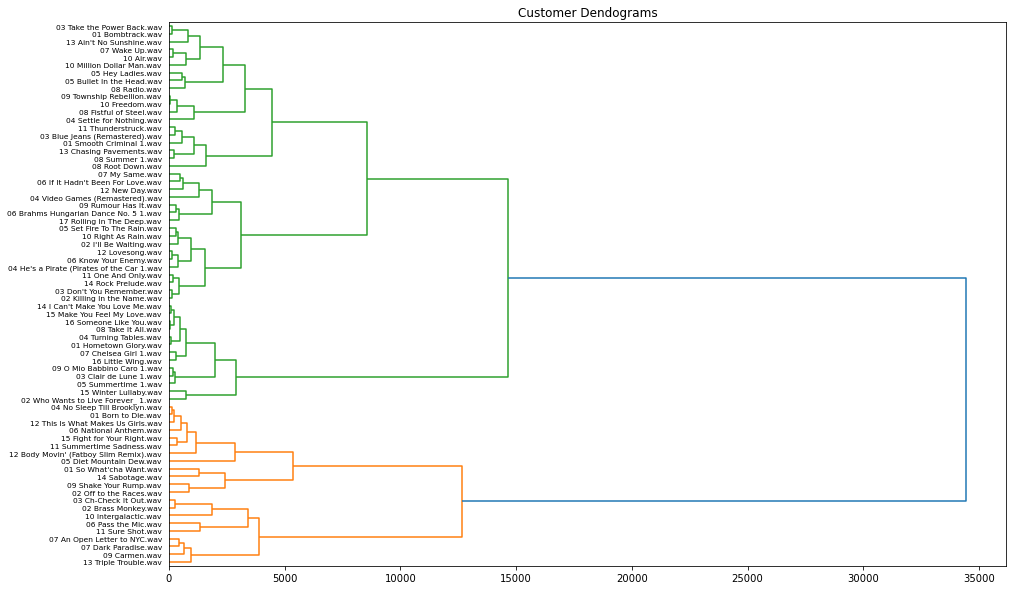

In [55]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

features_one = pd.read_csv("FeatureFileTrainingAllList1.csv")
best_features = []
for merkmal in pd.read_csv("subFeaturesTrain1.csv")["0"]:
    best_features.append(merkmal)

columns_in_features = []
for col in features_one.columns:
    if col in best_features:
        columns_in_features.append(features_one[col])
row_names = []     
trennstrich = '\\'

for row in features_one.index:
    row_names.append(features_one["Unnamed: 0"][row][:features_one["Unnamed: 0"][row].find(trennstrich)])

features = features_one[best_features]
features.index = row_names
data = features.values

plt.figure(figsize=(15, 10))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'), orientation="right", labels=row_names,leaf_font_size=7.5)
cluster = AgglomerativeClustering(n_clusters=10, affinity='cosine', linkage="single")
cluster.fit_predict(data)

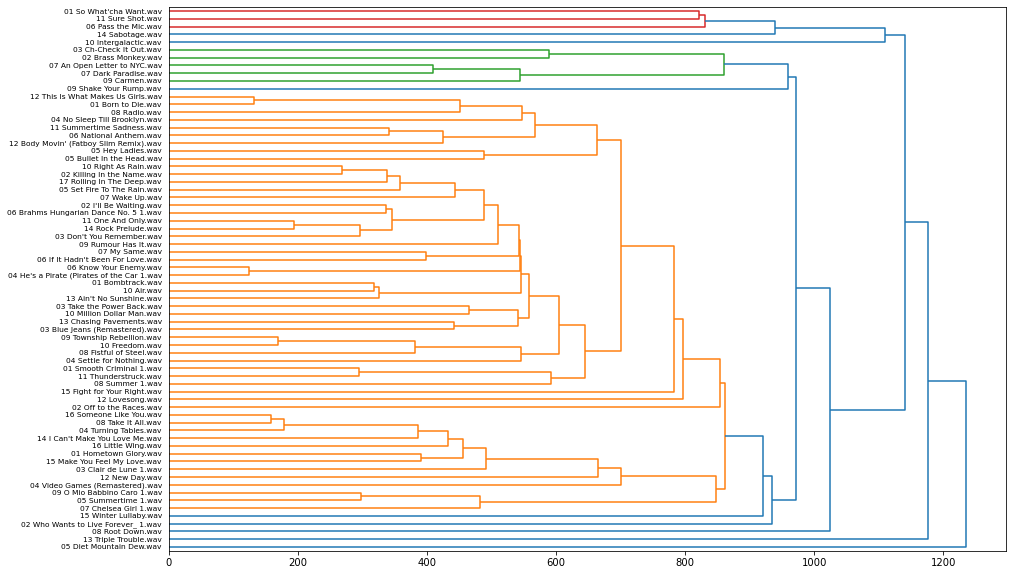

In [301]:
plt.figure(figsize=(15, 10))
dend = shc.dendrogram(shc.linkage(data, method='single'), orientation="right", labels=row_names,leaf_font_size=7.5)

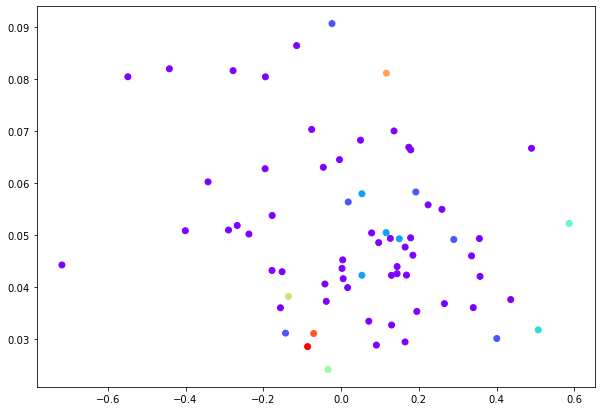

In [297]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

## <span style="color:#900C3F">Fazit</span> 

Zunächst ist zu erwähnen, dass uns der erste Teil (Konvertierung der Dateien) sehr viel wertvolle Zeit gekostet hat, wir es aber dennoch alleine hinbekommen haben. Allerdings haben wir dadurch auch noch einiges über den Umgang mit Audiodateien in Python gelernt. Also hatte die Aufgabe definitiv etwas Gutes an sich. 
Ein andere Schwierigkeit waren die Formulierungen - häufiger mussten wir mehrmals lesen und überlegen, um die Aufgaben korrekt (wie gewünscht) zu lösen. Damit war dieses Projekt mit Abstand das Projekt, an welchem wir am meisten, bzw am längsten gesessen sind.
Am interessantesten fanden wir die Aufgabe mit dem genetischen Algorithmus, obwohl auch diese Teilaufgabe einige Zeit geraubt hat. Als sehr hilfreich empfanden wir hier die zur Verfügung stehende Datei zur Lösung des TSP. So konnten wir die Theorie zum genetischen Algorithmus noch besser verstehen.
Auch, konnten wir die Aufgaben nicht gut aufteilen bzw. nicht überspringen, da wir oft Teilergebnisse aus den vorherigen Aufgaben brauchten. Vielleicht wäre es eine Idee Teilergebnisse zur Verfügung zu stellen, wenn es sich anbietet. Wir haben z.B. für die letzte Aufgabe zunächst ein Array aus nicht optimalen Merkmalen genommen, nur um schon mal anzufangen das Cluster zu erstellen, weil wir in dem genetischen Algorithmus noch Fehler hatten. 
Häufig ist nämlich genau das Beschäftigen mit einer anderen Thematik das, das im wesentlichen zum Lösen einer anderen Aufgabe beiträgt - einfach, weil man mal 'abschalten' kann.
Als sehr positiv sehen wir unsere verbesserten Scipy Kenntnisse an. Uns macht die Arbeit mit den verschiednenen Libraries stets viel Spaß.


Alles in allem hätte der Versuch für uns besser laufen können, aber wir haben dennoch viel mitgenommen. Also am Ende doch ein Erfolg.